分类问题：计算属于每个类别的概率，取最大值，所有概率相加为1

为了类别概率转换为相加为1，需要把把实数值映射到【0，1】，此时需要非线性变换

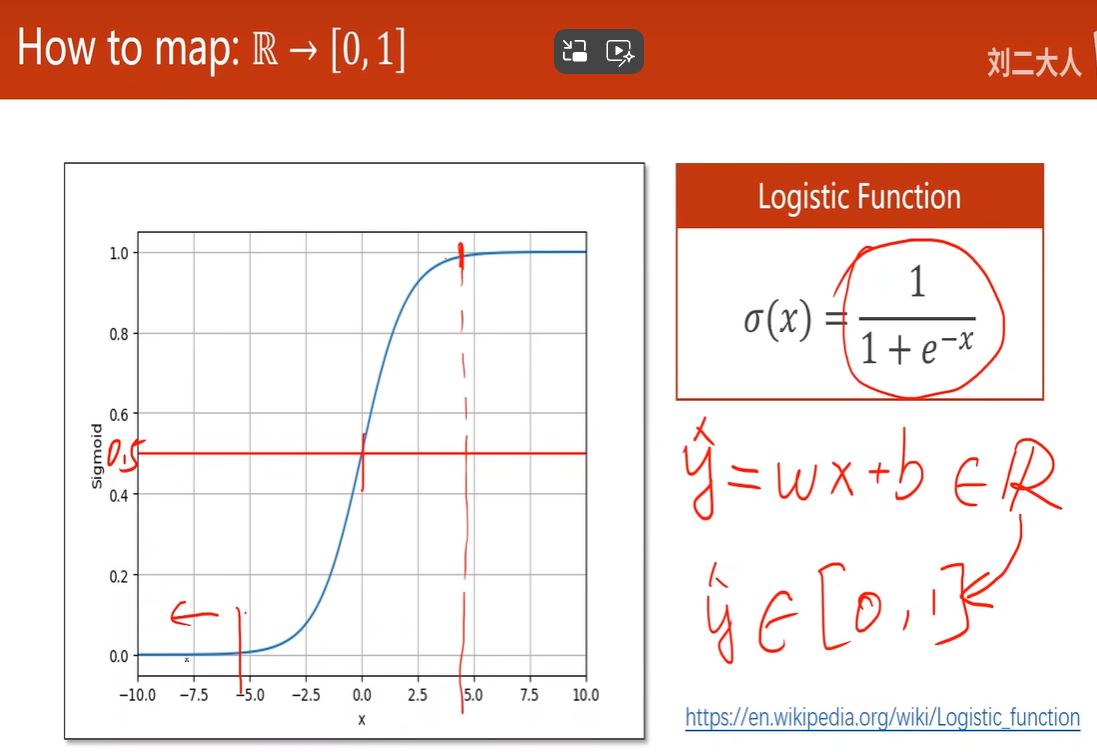

把yhat代为非线性函数里面的x

其他的函数

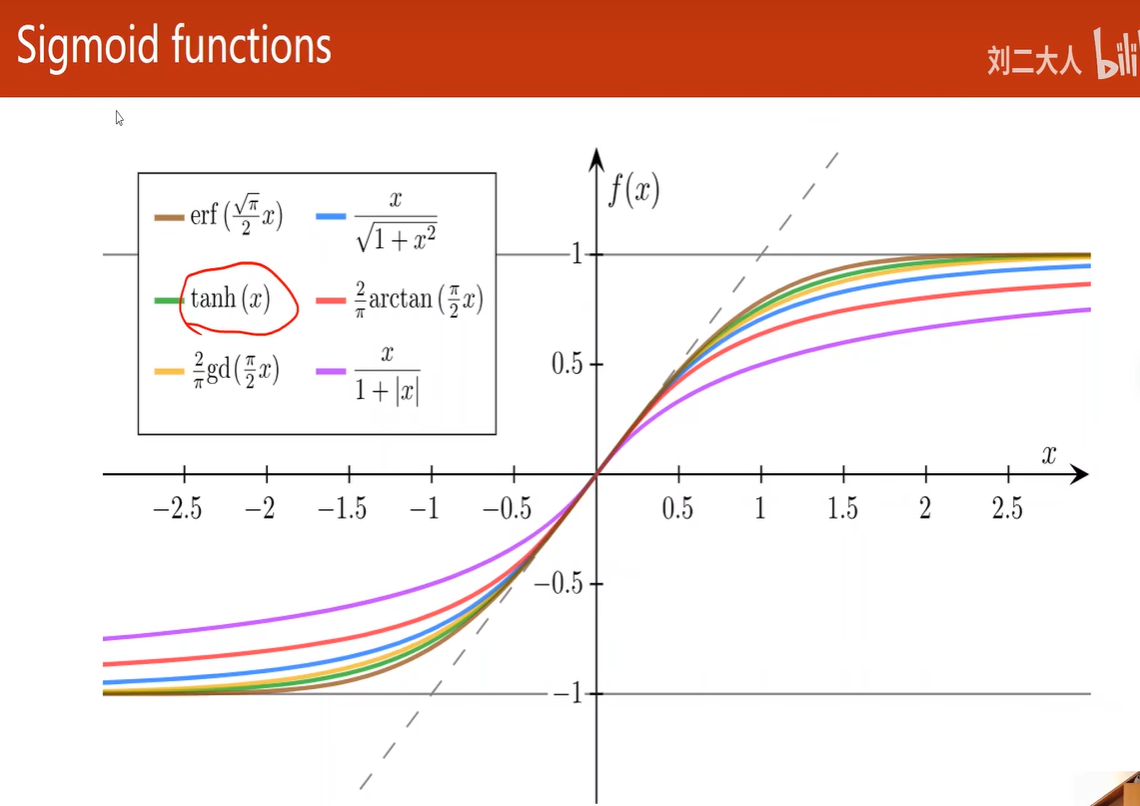

二分类只需要计算一个分类的概率就可以了，另一个可以用1减去

变换

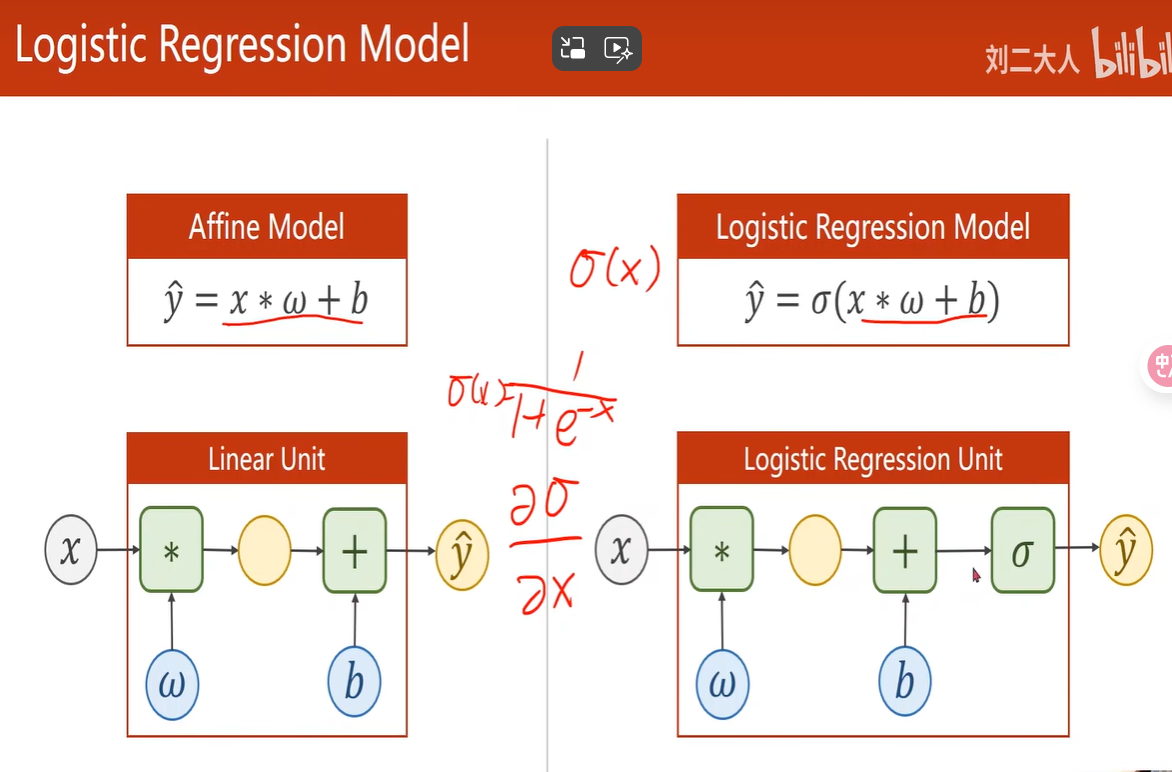

损失函数变换（类比交叉熵）：BCE损失

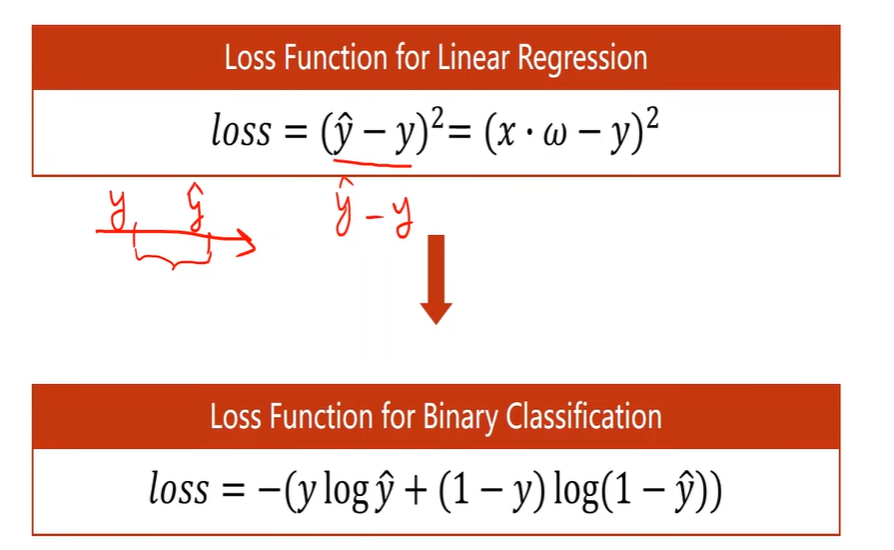

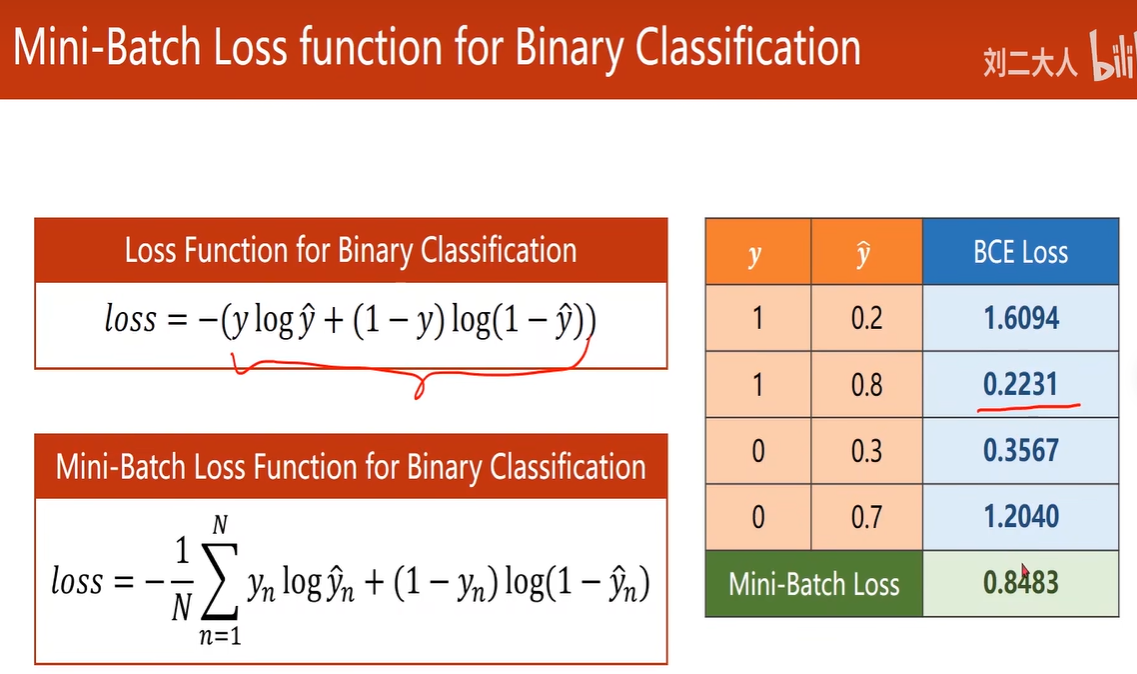

sigmoid函数在torch的functional里面

In [7]:
import torch  # 导入 PyTorch 库
import torch.nn as nn  # 导入 PyTorch 的神经网络模块
import torch.nn.functional as F  # 导入 PyTorch 的函数模块
import torch.optim as optim  # 导入 PyTorch 的优化模块

In [ ]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

In [9]:
criterion = torch.nn.BCELoss(size_average=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

d:\soft\anaconda\envs\d2l\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [10]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())

    optimizer.zero_grad()#梯度清零
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()

d:\soft\anaconda\envs\d2l\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.839020252227783
1 2.8230907917022705
2 2.807925224304199
3 2.793489456176758
4 2.7797493934631348
5 2.7666711807250977
6 2.7542219161987305
7 2.74237060546875
8 2.7310845851898193
9 2.720334768295288
10 2.7100918292999268
11 2.7003273963928223
12 2.691014528274536
13 2.682126998901367
14 2.673640251159668
15 2.66552996635437
16 2.657773971557617
17 2.650350570678711
18 2.6432387828826904
19 2.6364192962646484
20 2.629873514175415
21 2.623584270477295
22 2.617534637451172
23 2.6117091178894043
24 2.606093406677246
25 2.600672960281372
26 2.595435380935669
27 2.5903680324554443
28 2.5854597091674805
29 2.5806996822357178
30 2.576077461242676
31 2.571584463119507
32 2.567211151123047
33 2.5629498958587646
34 2.5587925910949707
35 2.554732322692871
36 2.5507616996765137
37 2.5468757152557373
38 2.543067455291748
39 2.539332866668701
40 2.535665512084961
41 2.5320615768432617
42 2.5285165309906006
43 2.525026321411133
44 2.521587371826172
45 2.518195867538452
46 2.5148489475250244
47 2.

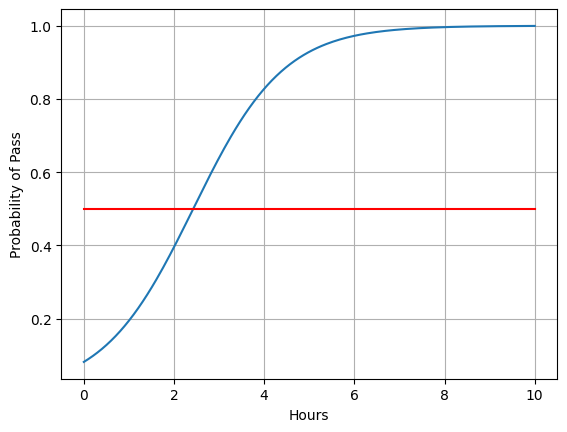

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)  # model 应该是你训练好的 PyTorch 模型
y = y_t.data.numpy()

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()


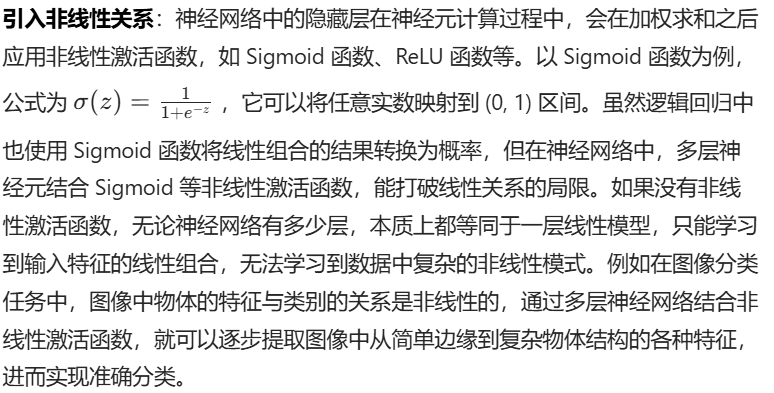

非线性

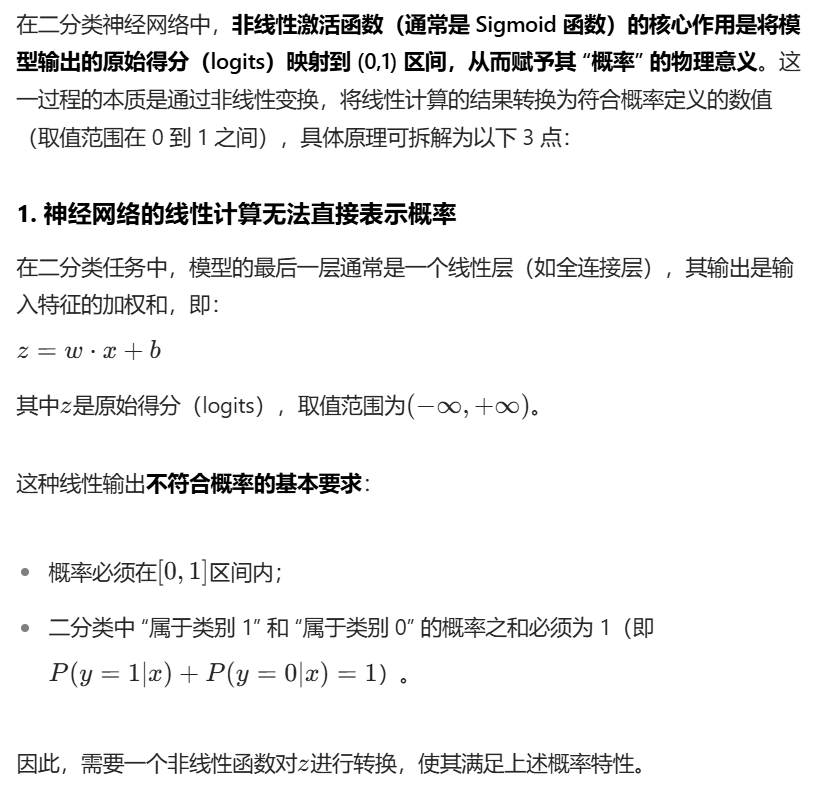
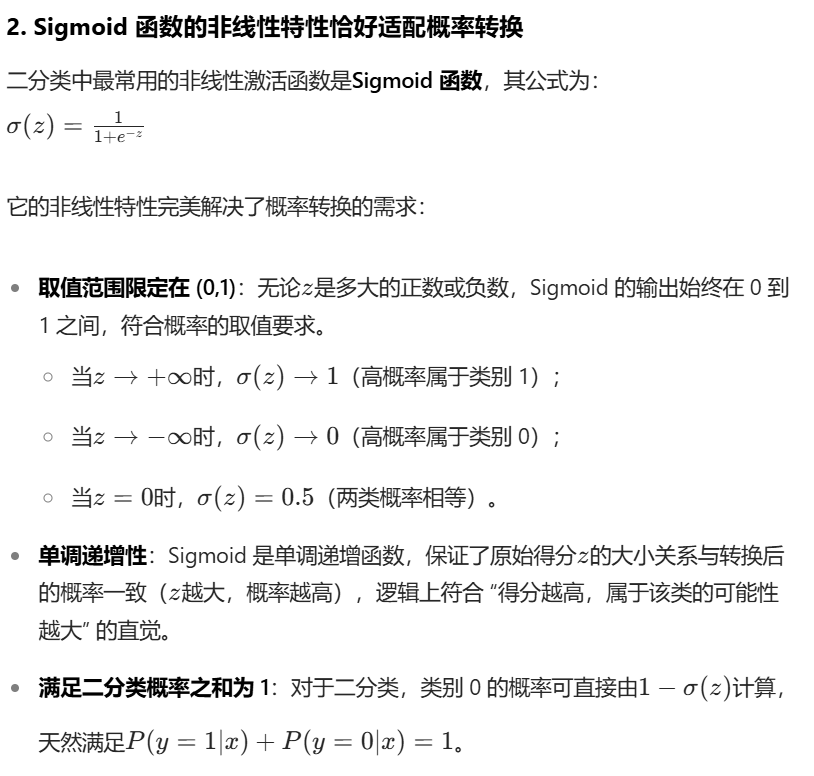
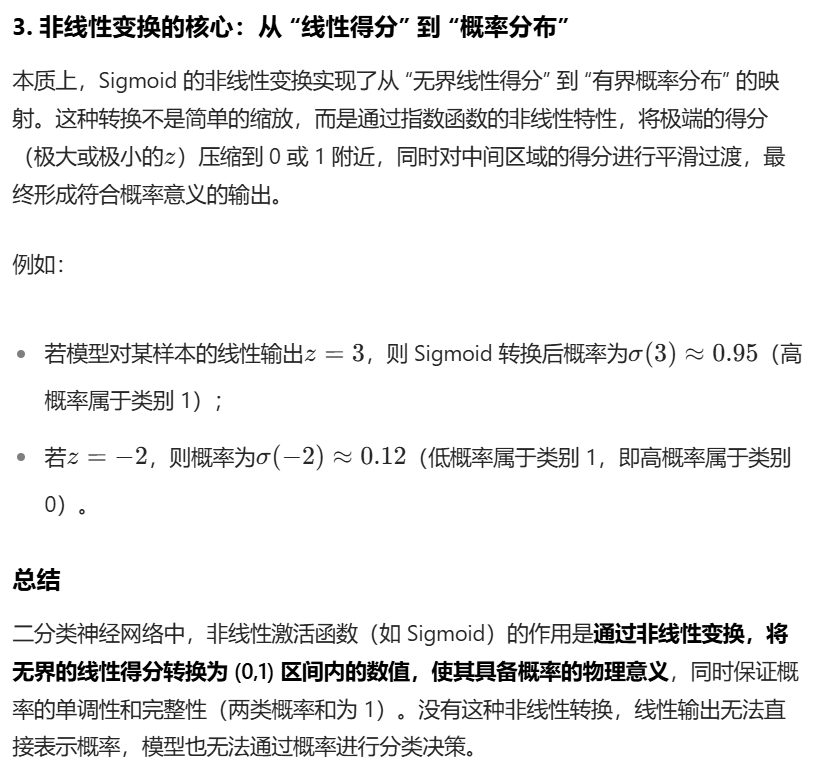

得分和分类结果

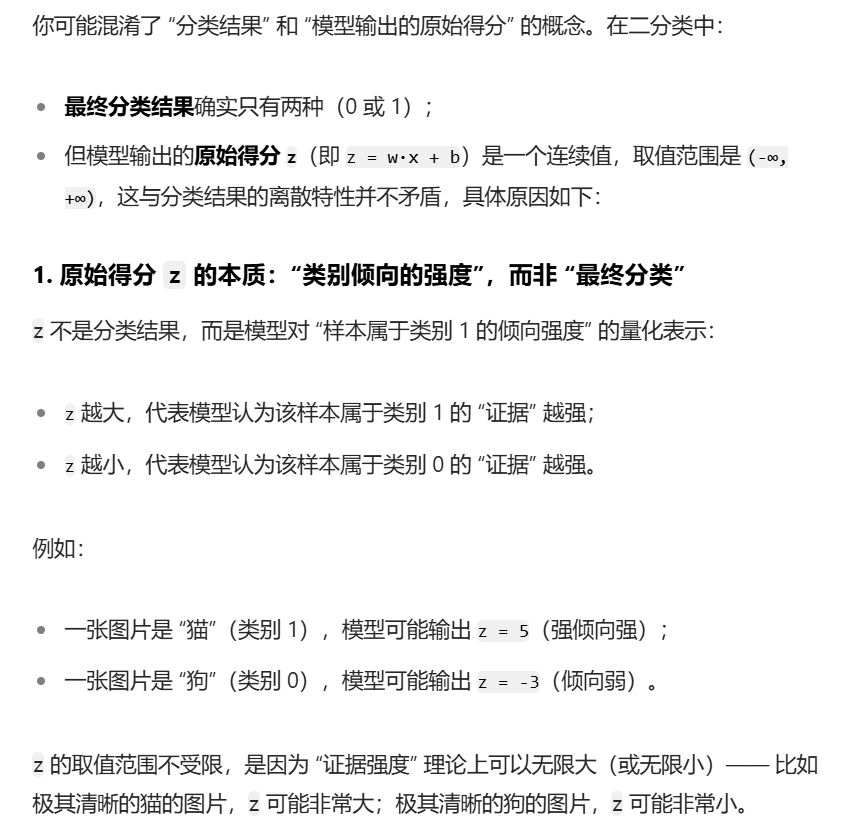
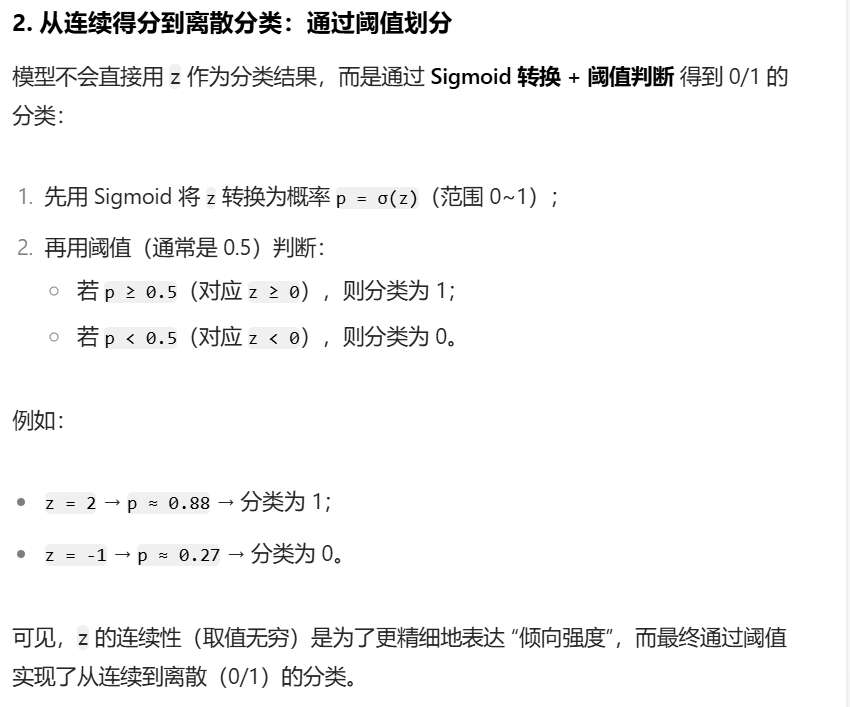
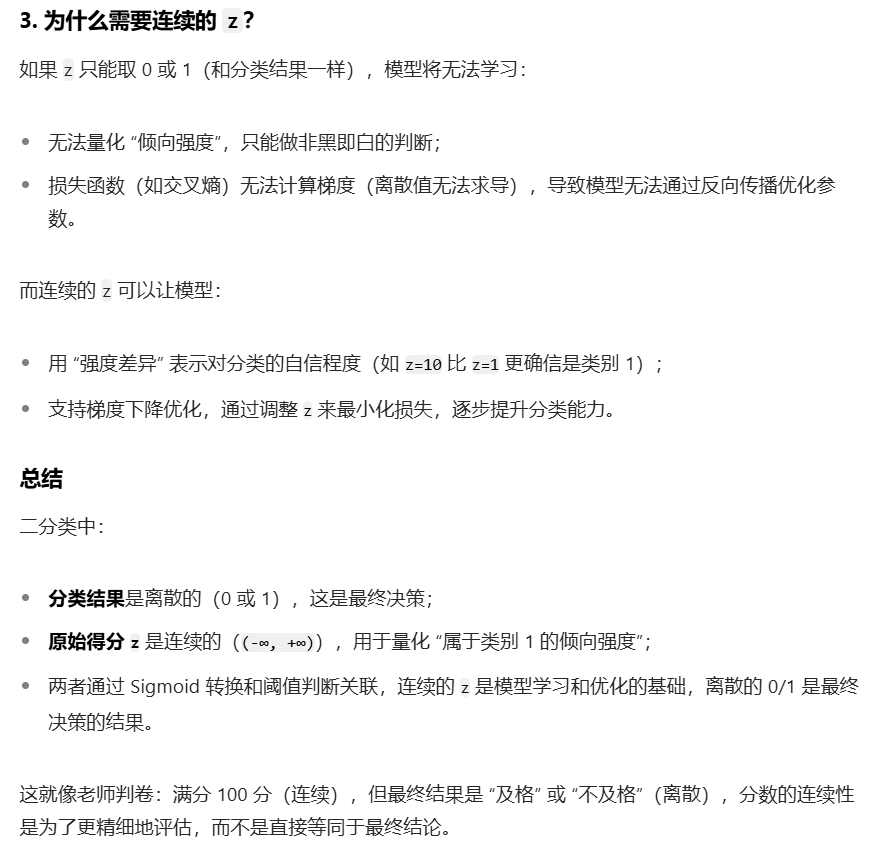

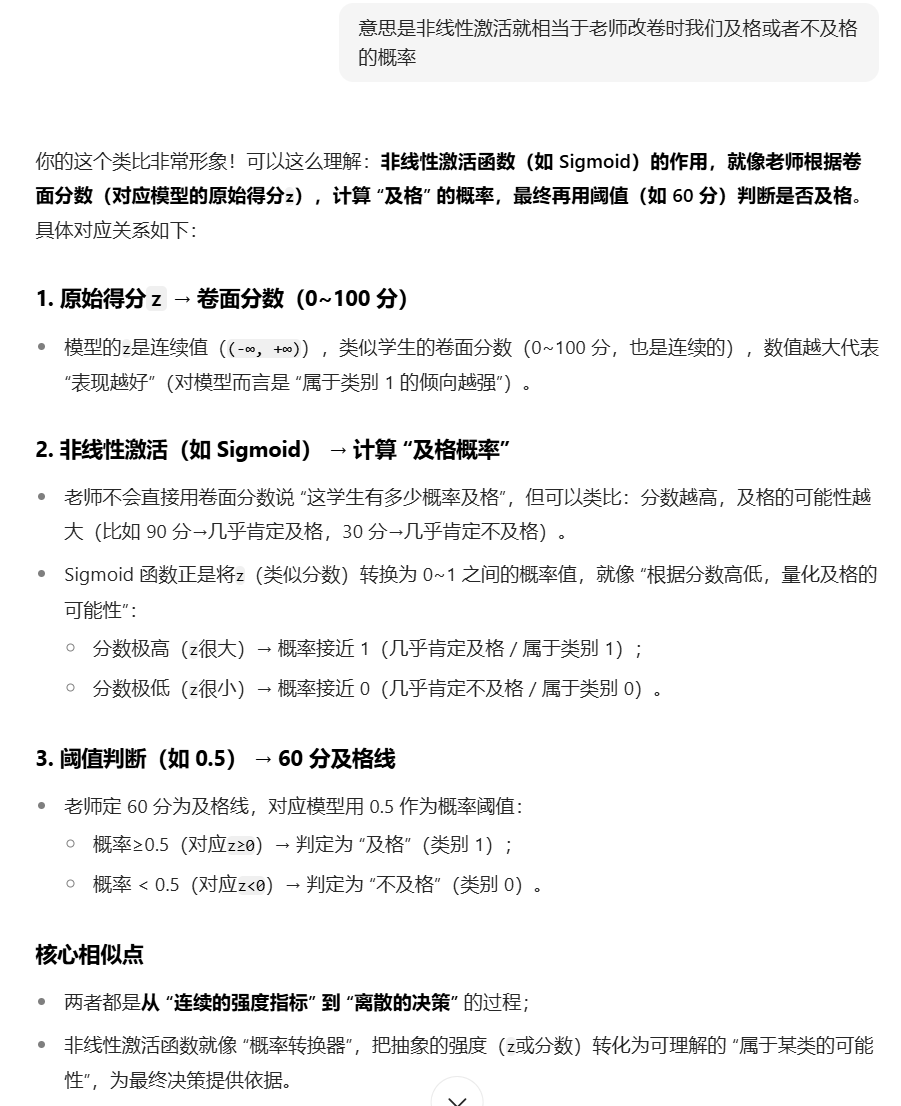